# Missing Value Treatment

In this tutorial, we will learn:

1. To mark missing values in a dataset.
2. How a machine learning algorithm can fail when it contains missing values.
3. How to remove rows that contain missing values.
4. To impute or replace missing values with sensible values.
5. How Models can be better when missing values are properly treated.

## What are **Missing Values**?

In most of the cases, real world data comes in messy or incomplete, or with some data points unable to be captured. These data points are then represented in many forms, e.g. 0, ?, etc. 


Missing values are caused by number of reasons which includes:

* Data entry errors
* Data Collection problems (e.g. unrecorded observations)
* Data corruption
* etc.

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as **NaN**.

Here and throughout the notebook, we'll refer to missing data in general as null, NaN, or NA values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/pima_diabetes_dataset.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,0,1,2,3,4,5.0,6.000,7,8
1,0.0,6,148,72,35,0,33.6,0.627,50,1
2,1.0,1,85,66,29,0,26.6,0.351,31,0
3,2.0,8,183,64,0,0,23.3,0.672,32,1
4,3.0,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.isnull().sum()

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [5]:
missing_values = (data == 0).sum()

In [6]:
print(missing_values)

0      1
1    112
2      5
3     35
4    227
5    374
6     11
7      0
8      0
9    500
dtype: int64


In [7]:
# Replacing 0 with NaN.
data.replace(0,np.nan,inplace=True)

In [8]:
data

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.000,7,8.0
1,NaN,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
2,1.0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
3,2.0,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
4,3.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
...,...,...,...,...,...,...,...,...,...,...
764,763.0,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
765,764.0,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
766,765.0,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
767,766.0,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [9]:
data.isnull().sum()

0      2
1    112
2      5
3     35
4    227
5    374
6     11
7      0
8      0
9    500
dtype: int64

## Visualize the Missing Data

The MissingNo (Missing Number) package is used for graphical analysis of Missing data

In [10]:
# !pip install missingno

<AxesSubplot:>

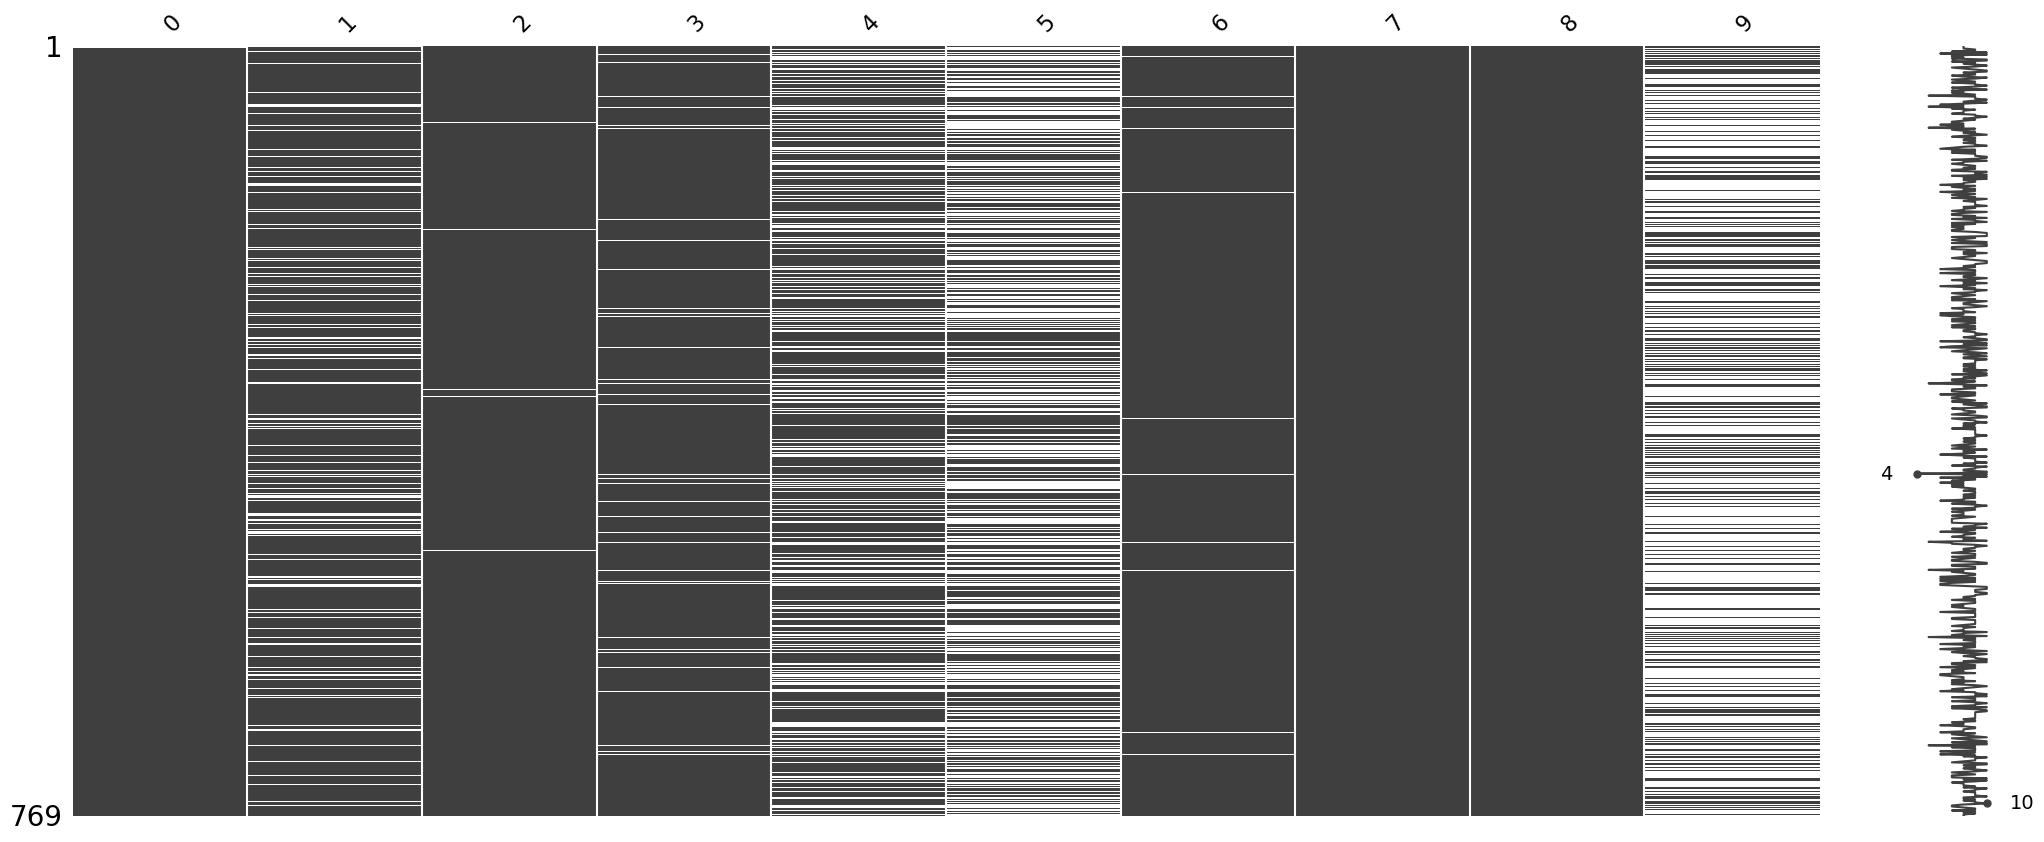

In [11]:
import missingno as msno
msno.matrix(data)

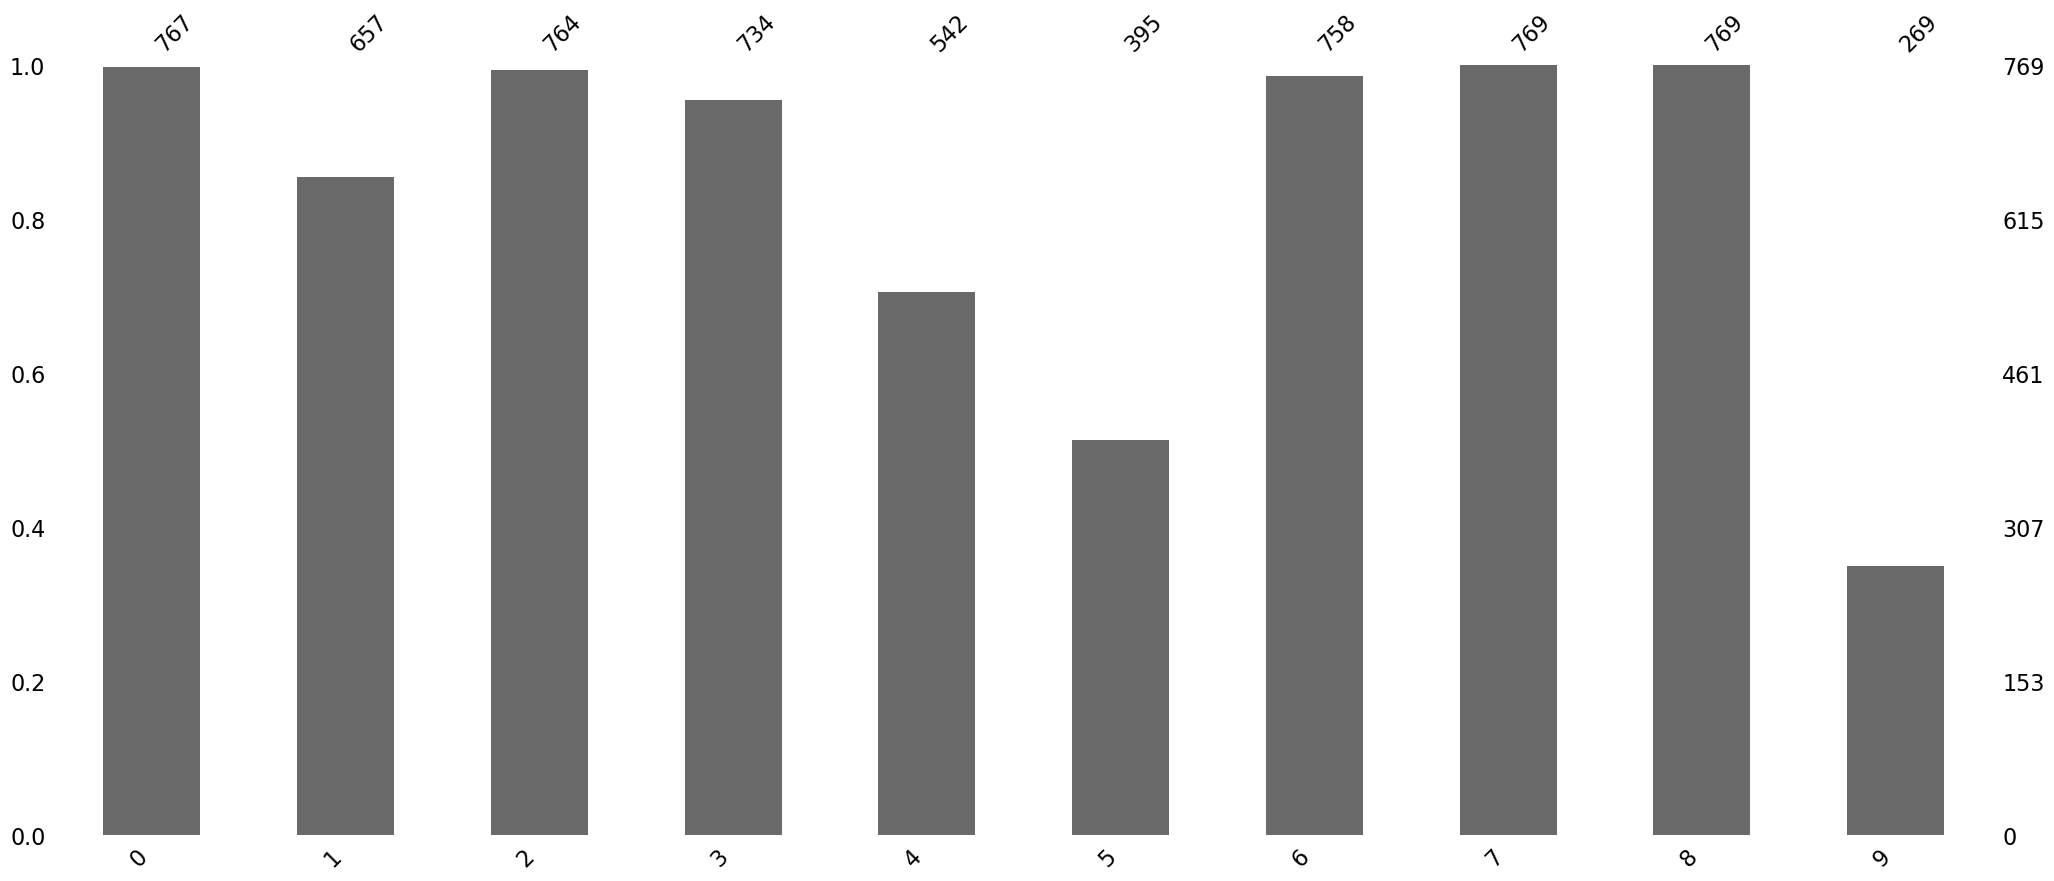

In [12]:
msno.bar(data)
plt.show()

## Why do we need to deal with missing values?

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

values = data.values
X = values[:,0:8]
y = values[:,8]

# define the model
model = LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=3,shuffle=True, random_state=1)

# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: nan


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 544, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vamsh\anaconda3\lib\s

## Dealing with Missing Values

### Dropping the Rows and Columns with Missing Values

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data.

In [14]:
print('Shape of dataset before droping NaN:', data.shape)

df = data.dropna()

print('Shape of dataset after droping NaN:', df.shape)

Shape of dataset before droping NaN: (769, 10)
Shape of dataset after droping NaN: (111, 10)


Now let's try our new dataset with no missing values on **LDA** algorithm.

In [15]:
values = df.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=50)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.2f' % np.mean(result))

Accuracy: 0.04


### **Impute Missing Values**

We can impute Missing Values using several strategies. Below is just a few of the common means:

1. A meaningful constant value in the domain, such as 0 which is distinct from all other values.
2. A mean, median or mode value for the column.
3. A value from another randomly selected record.
4. A value estimated by another predictive model.

#### 1. Filling the Missing Values with a Central Tendency (Mean,Median, Mode)

AxesSubplot(0.125,0.11;0.775x0.77)
0


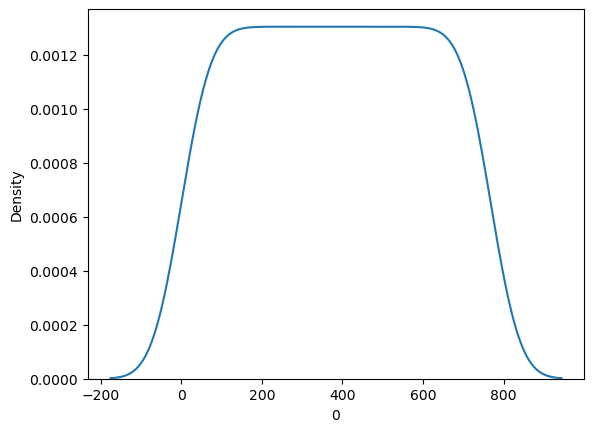

AxesSubplot(0.125,0.11;0.775x0.77)
1


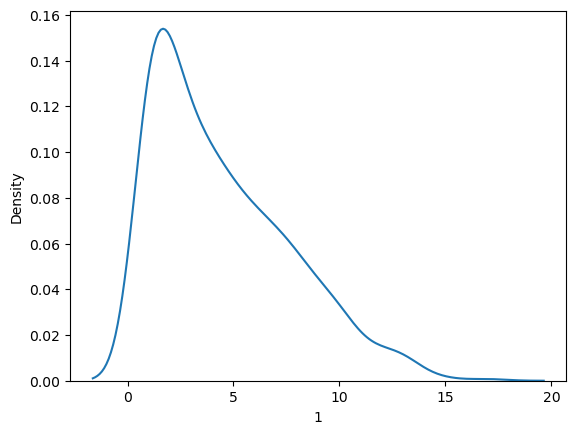

AxesSubplot(0.125,0.11;0.775x0.77)
2


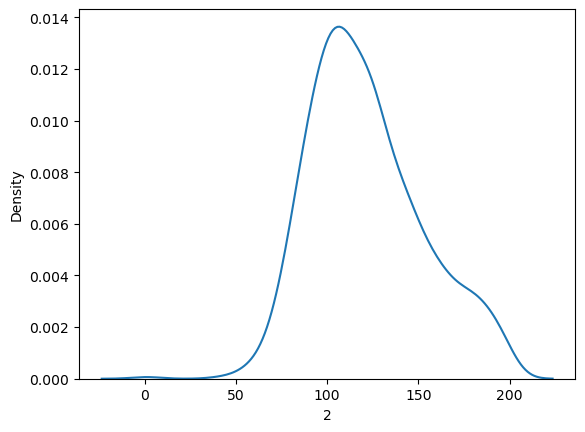

AxesSubplot(0.125,0.11;0.775x0.77)
3


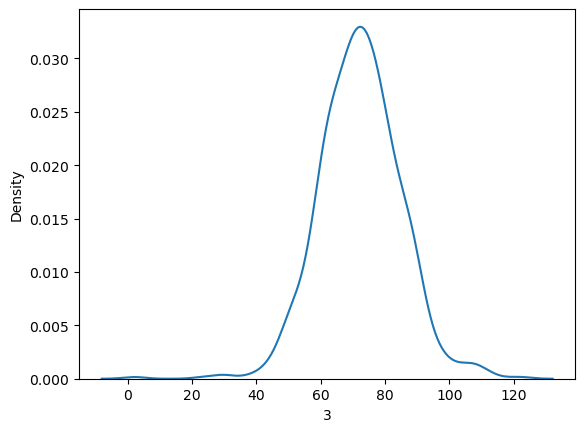

AxesSubplot(0.125,0.11;0.775x0.77)
4


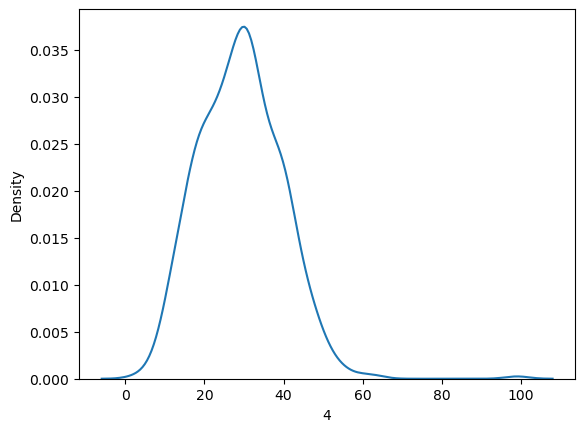

AxesSubplot(0.125,0.11;0.775x0.77)
5


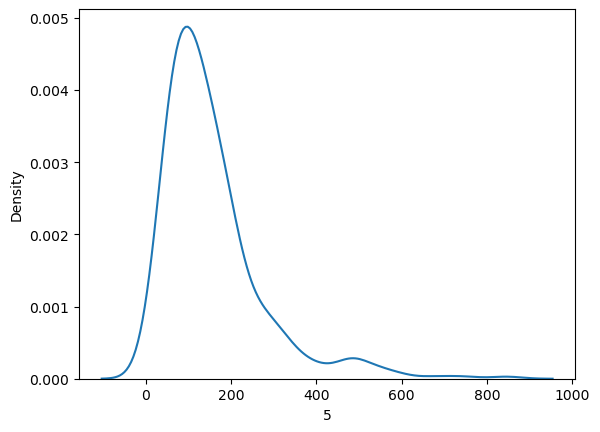

AxesSubplot(0.125,0.11;0.775x0.77)
6


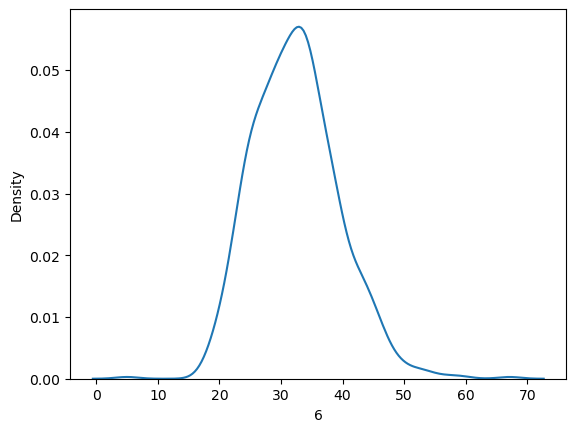

AxesSubplot(0.125,0.11;0.775x0.77)
7


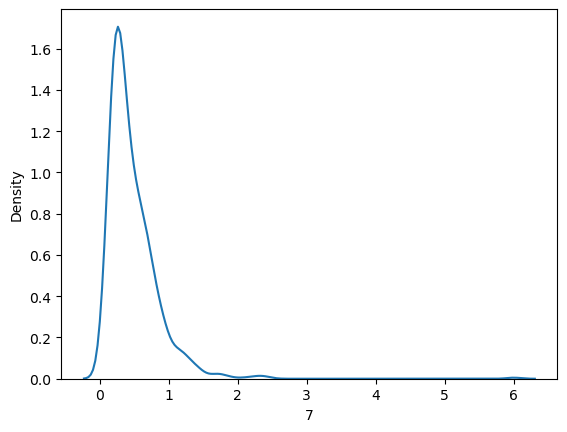

AxesSubplot(0.125,0.11;0.775x0.77)
8


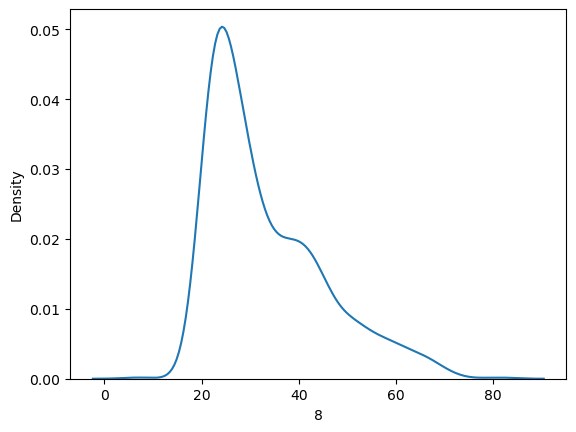

AxesSubplot(0.125,0.11;0.775x0.77)
9


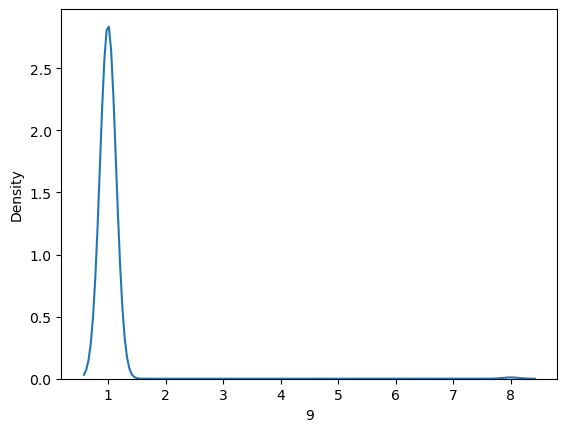

In [16]:
for col in data.columns:
    print(sns.kdeplot(data[col]))
    print(col)
    plt.show()

In [17]:
data2 = data.copy()
data2

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.000,7,8.0
1,NaN,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
2,1.0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
3,2.0,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
4,3.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
...,...,...,...,...,...,...,...,...,...,...
764,763.0,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
765,764.0,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
766,765.0,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
767,766.0,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


In [18]:
print(data.isnull().sum())
for col in data.columns:
    data[col].fillna(data[col].median(),inplace=True)
print(data.isnull().sum())

0      2
1    112
2      5
3     35
4    227
5    374
6     11
7      0
8      0
9    500
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


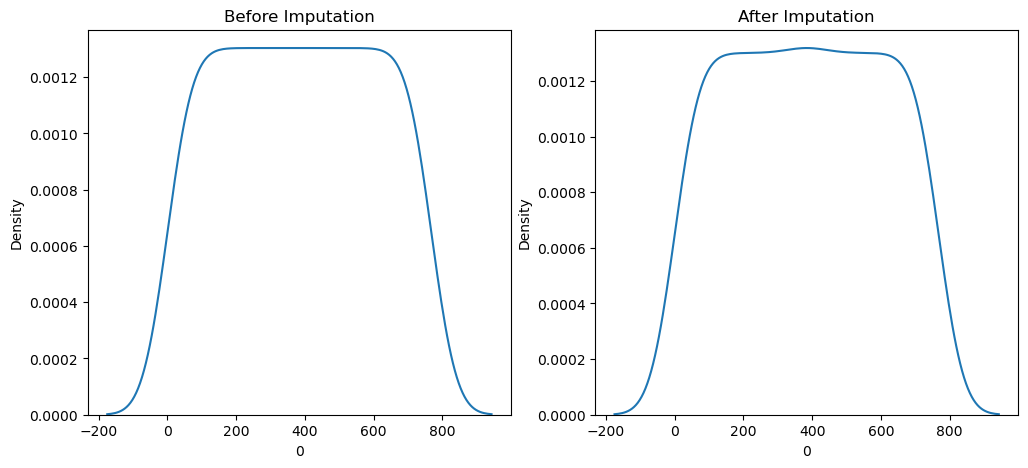

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Imputation')
sns.kdeplot(data2[0],ax=ax1)

# after scaling
ax2.set_title('After Imputation')
sns.kdeplot(data[0],ax=ax2)
plt.show()

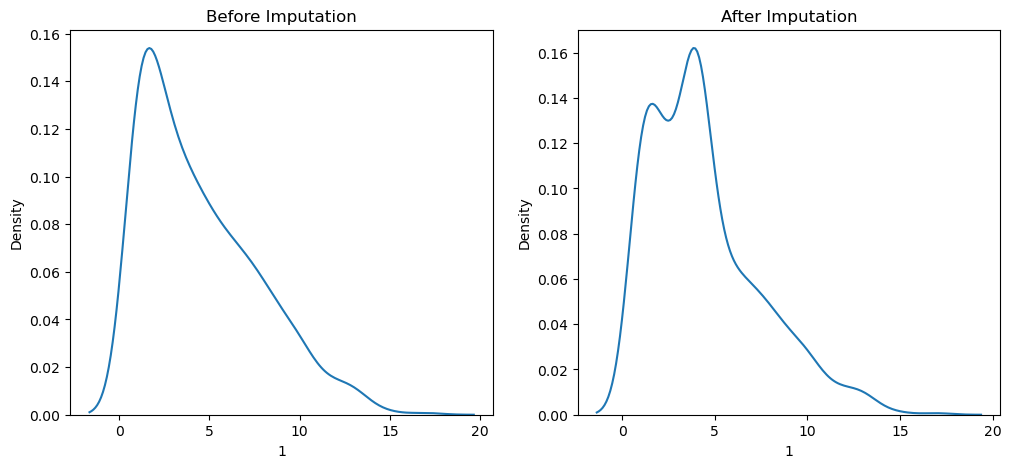

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Imputation')
sns.kdeplot(data2[1],ax=ax1)

# after scaling
ax2.set_title('After Imputation')
sns.kdeplot(data[1],ax=ax2)
plt.show()

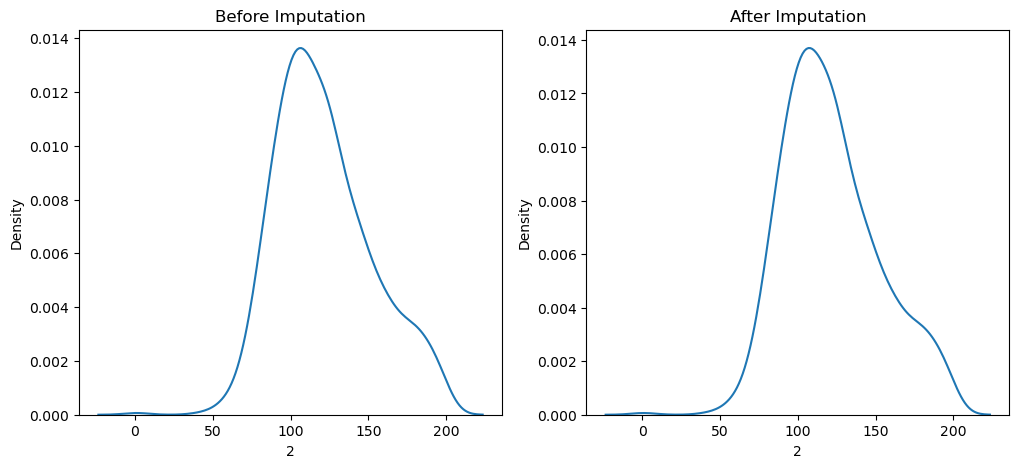

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Imputation')
sns.kdeplot(data2[2],ax=ax1)

# after scaling
ax2.set_title('After Imputation')
sns.kdeplot(data[2],ax=ax2)
plt.show()

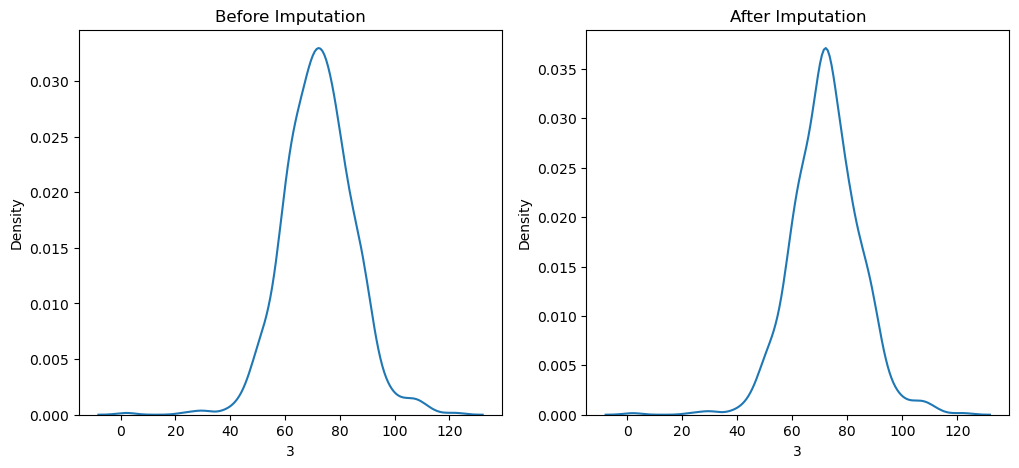

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Imputation')
sns.kdeplot(data2[3],ax=ax1)

# after scaling
ax2.set_title('After Imputation')
sns.kdeplot(data[3],ax=ax2)
plt.show()

# Using Scikit-learn's Simple Imputer

In [49]:
from sklearn.impute import SimpleImputer

In [52]:
# define the imputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')

In [53]:
# transformed dataset
transformed_values  = imputer.fit_transform(values)

In [54]:
# count the number of NaN values in each column
print('Missing : %.2f' % np.isnan(transformed_values).sum())

Missing : 0.00


Let's again to see if this time we can use our dataset to build algorithm on **Linear Discriminant Analysis (LDA)** algorithm 


In [64]:

from sklearn.pipeline import Pipeline

df = pd.read_csv('datasets/pima_diabetes_dataset.csv', header=None)
# mark zero values as missing or NaN
df=df.replace(0, np.nan)
# split dataset into inputs and outputs
values = df.values
x = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=4, shuffle=True, random_state=50)
# evaluate the model
result = cross_val_score(pipeline, x, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())


Accuracy: 0.085
